# REINFORCE algorithm training analysis and performance

In [1]:
import matplotlib.pyplot as plt  
import numpy as np 
import matplotlib.pyplot as plt
import os
import pickle
from pathlib import Path

In [2]:
Data_path_DQ = '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Data/'
TrainedDQLearning_plots = '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Plots'
timename_DQ = '_20241027_081302'

In [3]:
errors_file_DQ = Data_path_DQ + 'training_errors' + timename_DQ + '.npz'
rewards_file_DQ = Data_path_DQ + 'rewards' + timename_DQ + '.npy'
episode_length_file_DQ = Data_path_DQ + 'episode_length' + timename_DQ + '.npy'
episode_info_file_DQ = Data_path_DQ + 'episode_info' + timename_DQ + '.pkl'

### Loading data

In [4]:
# Load the numpy arrays
rewards_DQ = np.load(rewards_file_DQ)
episode_lengths_DQ = np.load(episode_length_file_DQ)

# Load the pickle file
with open(episode_info_file_DQ, 'rb') as file:
    episode_info_DQ = pickle.load(file)

In [5]:
rewards_DQ_normalized = (rewards_DQ - np.min(rewards_DQ))/(np.max(rewards_DQ)-np.min(rewards_DQ))

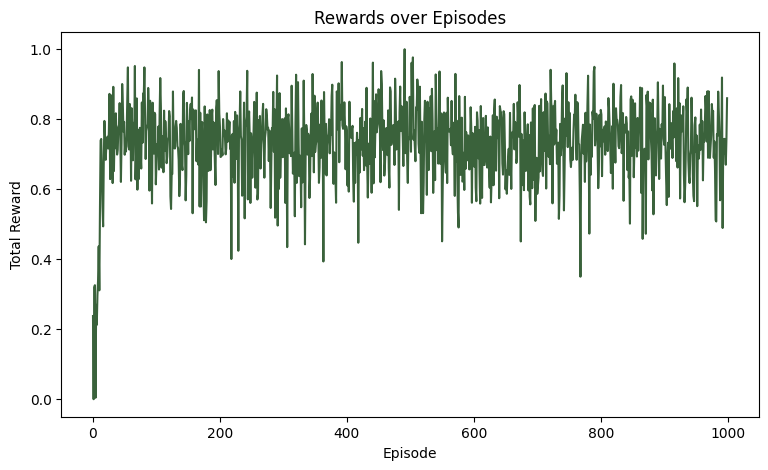

In [7]:
# Plot rewards
plt.figure(figsize=(9, 5))
plt.plot(rewards_DQ_normalized, label='DQN', color='#3a623b')  
plt.title('Rewards over Episodes')
plt.xlabel('Episode')
plt.ylabel('Total Reward')

imagefile = 'rewards' + timename_DQ + '.png'
if not os.path.exists(TrainedDQLearning_plots):
    os.makedirs(TrainedDQLearning_plots)
file_path = os.path.join(TrainedDQLearning_plots, imagefile)
plt.savefig(file_path)
plt.show()

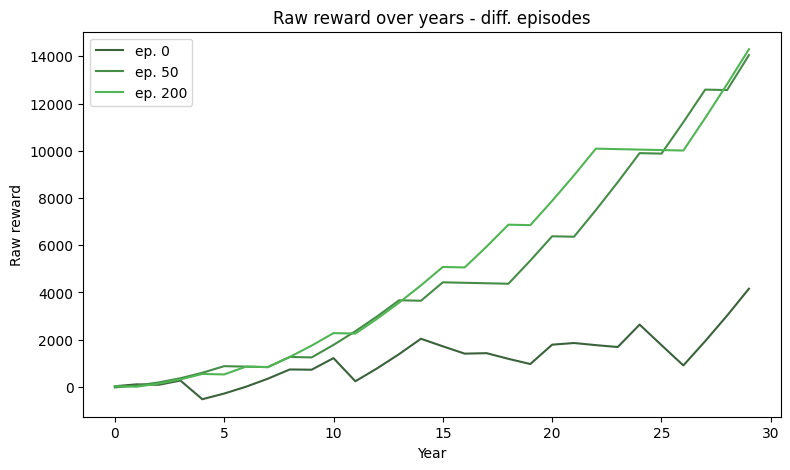

In [7]:
year = episode_info_DQ[0]['year']
raw_reward_0 = episode_info_DQ[0]['raw_reward']
raw_reward_50 = episode_info_DQ[100]['raw_reward']
raw_reward_200 = episode_info_DQ[900]['raw_reward']

plt.figure(figsize=(9, 5))
plt.plot(raw_reward_0, label='ep. 0', color='#3a623b')
plt.plot(raw_reward_50, label='ep. 50', color='#458C47')  
plt.plot(raw_reward_200, label='ep. 200', color='#50B553')  
plt.title('Raw reward over years - diff. episodes')
plt.xlabel('Year')
plt.ylabel('Raw reward')
plt.legend() 


imagefile = 'rewards' + timename_DQ + '.png'
if not os.path.exists(TrainedDQLearning_plots):
    os.makedirs(TrainedDQLearning_plots)
file_path = os.path.join(TrainedDQLearning_plots, imagefile)
plt.savefig(file_path)
plt.show()

### Error Calculation

In [10]:
errors_DQL = np.load(errors_file_DQ)

print(errors_DQL)

NpzFile '/home/elisa/Desktop/Uni/SecondY/RL/SecondPart/SummerClaude/TrainedDQLearning/Data/training_errors_20241027_081302.npz' with keys: step_errors, episode_errors


In [12]:
errors_DQL = np.load(errors_file_DQ)

step_error_DQ = errors_DQL['step_errors']
print("Length of avg_error_RE:", len(step_error_DQ))
ep_errors_DQ = errors_DQL['episode_errors']
print("Length of all_error_RE:", len(ep_errors_DQ))

Length of avg_error_RE: 29969
Length of all_error_RE: 6707


In [17]:
avg_error = ep_errors_DQ[:6000:6]
print(len(avg_error))

1000


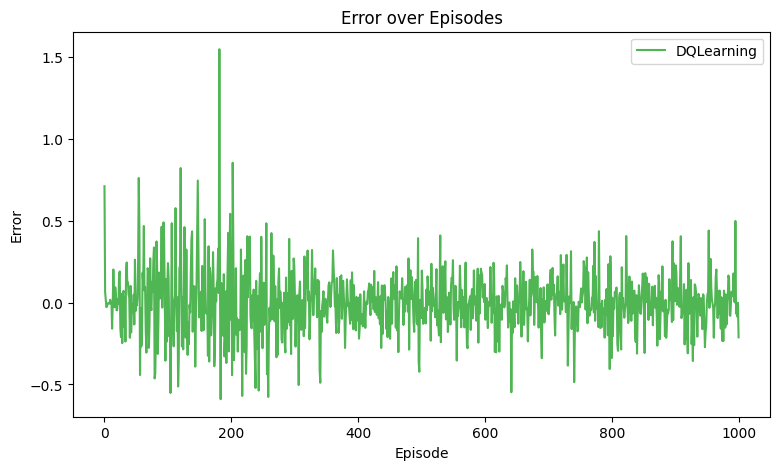

In [18]:
file_name = "REINFORCE_errorrs"

plt.figure(figsize=(9, 5))
plt.plot(avg_error, label='DQLearning', color='#50B553') 
plt.title('Error over Episodes')
plt.xlabel('Episode')
plt.ylabel('Error')
plt.legend() 

imagefile = file_name + '.png'
if not os.path.exists(TrainedDQLearning_plots):
    os.makedirs(TrainedDQLearning_plots)
file_path = os.path.join(TrainedDQLearning_plots, imagefile)
plt.savefig(file_path)

plt.show()